In [52]:
#  core
import pandas as pd
import numpy as np
import joblib
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# movie recommender
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
# clustering
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
# NLP
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\areza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data Analysis Pepeline:
1. Data Exploration
2. Data Cleaning
3. Feature Engineering
4. EDA (Visualisation)
5. Text Vectorization
6. Movie Recommender
7. Movie Clustering

# **STEP 1: Data Exploration**

## **Column Descriptions**

| Column Name | Description |
|-------------|-------------|
| **name**     | 🎥 Title of the movie (e.g., *The Shining*) |
| **rating**   | 🟨 Age rating assigned to the movie (e.g., *R*, *PG*, *PG-13*) |
| **genre**    | 📂 Main genre of the movie (e.g., *Drama*, *Comedy*) |
| **year**     | 📅 Release year (numeric, e.g., *1980*) |
| **released** | 🗓 Full release date string (e.g., *June 13, 1980 (United States)*) |
| **score**    | ⭐ IMDb score or average viewer rating (float, e.g., *8.4*) |
| **votes**    | 🧮 Number of user ratings on IMDb (e.g., *927000*) |
| **director** | 🎬 Director’s name (e.g., *Stanley Kubrick*) |
| **writer**   | ✍️ Writer or screenplay author (e.g., *Stephen King*) |
| **star**     | 🌟 Lead actor/actress (e.g., *Jack Nicholson*) |
| **country**  | 🌍 Production country (e.g., *United States*, *United Kingdom*) |
| **budget**   | 💵 Estimated production budget (numeric, in USD) |
| **gross**    | 💰 Total box office gross (numeric, in USD) |
| **company**  | 🏢 Production or distribution company (e.g., *Warner Bros.*) |
| **runtime**  | ⏱ Movie runtime in minutes (e.g., *146*) |

📌 **Dataset Source:**  
[Movie Dataset on Kaggle by Ehab Abdelkarim](https://www.kaggle.com/code/ehababdelkarim/movie-dataset)

## **Descriptive Statistics**

In [2]:
FILEPATH = "C:/Users/areza/Desktop/movies.csv"

df = pd.read_csv(FILEPATH)
df.sample(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2644,Clueless,PG-13,Comedy,1995,"July 19, 1995 (United States)",6.8,193000.0,Amy Heckerling,Amy Heckerling,Alicia Silverstone,United States,12000000.0,56631572.0,Paramount Pictures,97.0
4434,My Life Without Me,R,Drama,2003,"March 7, 2003 (Spain)",7.5,24000.0,Isabel Coixet,Isabel Coixet,Sarah Polley,Spain,NaN,9781854.0,El Deseo,106.0
3246,"Lock, Stock and Two Smoking Barrels",R,Action,1998,"August 28, 1998 (United Kingdom)",8.2,547000.0,Guy Ritchie,Guy Ritchie,Jason Flemyng,United Kingdom,NaN,3753929.0,Summit Entertainment,107.0
3040,Grace of My Heart,R,Comedy,1996,"September 13, 1996 (United States)",6.7,3600.0,Allison Anders,Allison Anders,Illeana Douglas,United States,5000000.0,660313.0,Cappa Production,116.0
7336,Every Day,PG-13,Drama,2018,"February 23, 2018 (United States)",6.5,20000.0,Michael Sucsy,Jesse Andrews,Angourie Rice,Canada,4900000.0,10421847.0,Likely Story,97.0
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000.0,NaN,Notis Studio,78.0
5161,TMNT,PG,Animation,2007,"March 23, 2007 (United States)",6.2,62000.0,Kevin Munroe,Kevin Munroe,Patrick Stewart,Hong Kong,34000000.0,95802916.0,4Kids Entertainment,103.0
3571,The Rage: Carrie 2,R,Horror,1999,"March 12, 1999 (United States)",4.7,16000.0,Katt Shea,Stephen King,Emily Bergl,United States,21000000.0,17762705.0,United Artists,104.0
2433,The Nutcracker,G,Family,1993,"November 24, 1993 (United States)",5.9,1900.0,Emile Ardolino,Susan Cooper,Darci Kistler,United States,19000000.0,2119994.0,Krasnow Productions,92.0
3455,Office Space,R,Comedy,1999,"February 19, 1999 (United States)",7.7,248000.0,Mike Judge,Mike Judge,Ron Livingston,United States,10000000.0,10828256.0,Twentieth Century Fox,89.0


In [3]:
def quick_overview(df):
    return pd.DataFrame({
        "dtype": df.dtypes,
        "nunique": df.nunique(),
        "missing": df.isnull().sum()
    }).reset_index().rename(columns={"index": "column"})
quick_overview(df)

,column,dtype,nunique,missing
0,name,object,7512,0
1,rating,object,12,77
2,genre,object,19,0
3,year,int64,41,0
4,released,object,3414,2
5,score,float64,72,3
6,votes,float64,936,3
7,director,object,2949,0
8,writer,object,4535,3
9,star,object,2814,1


In [4]:
def check_df(df, target=None, head=3):
    pd.set_option("display.max_columns", None)
    pd.set_option("display.width", 500)

    print("#################### SHAPE ########################")
    print(f"🔹 Rows: {df.shape[0]} | 🔹 Columns: {df.shape[1]}\n")

    print("#################### INFO #########################")
    print(df.info(), "\n")

    print("################## DESCRIPTIVE STATS (categorical) ##################")
    display(df.describe(include='object').T.style.background_gradient(cmap='PuBu'))

check_df(df)

#################### SHAPE ########################
🔹 Rows: 7668 | 🔹 Columns: 15

#################### INFO #########################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB
None 

################## DESCRI

,count,unique,top,freq
name,7668,7512,Nobody's Fool,3
rating,7591,12,R,3697
genre,7668,19,Comedy,2245
released,7666,3414,"October 4, 1991 (United States)",9
director,7668,2949,Woody Allen,38
writer,7665,4535,Woody Allen,37
star,7667,2814,Nicolas Cage,43
country,7665,59,United States,5475
company,7651,2385,Universal Pictures,377


# **STEP 2: Data Cleaning**

In [5]:
# missing values inspection
missing_values = df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

budget      2171
gross        189
rating        77
company       17
runtime        4
writer         3
score          3
votes          3
country        3
released       2
star           1
dtype: int64

<Axes: >

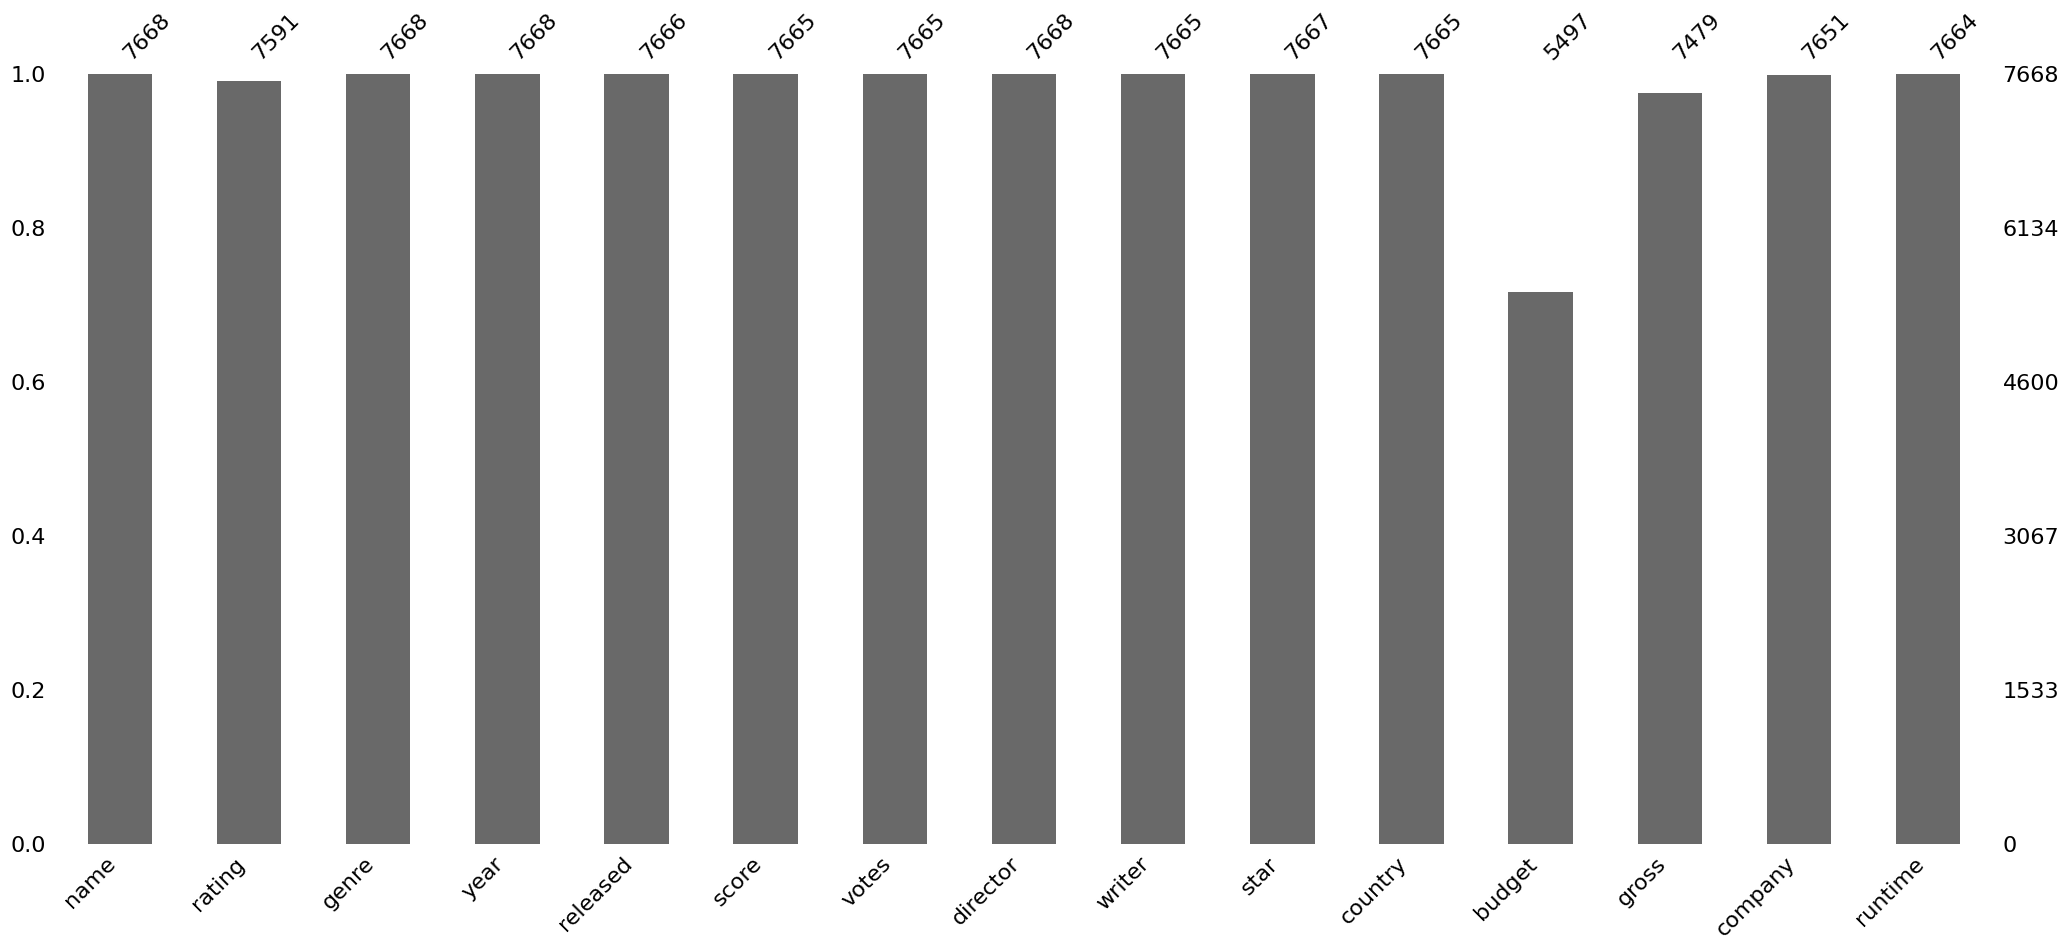

In [6]:
# missing values visualization
msno.bar(df)

In [7]:
# BUDGET fallback chain
df["budget"] = df.groupby(["genre", "year"])["budget"].transform(lambda x: x.fillna(x.median()))
df["budget"] = df.groupby("genre")["budget"].transform(lambda x: x.fillna(x.median()))
df["budget"] = df["budget"].fillna(df["budget"].median())
df['budget'].isnull().sum()


np.int64(0)

In [8]:
# GROSS fallback chain
df["gross"] = df.groupby(["genre", "year"])["gross"].transform(lambda x: x.fillna(x.median()))
df["gross"] = df.groupby("genre")["gross"].transform(lambda x: x.fillna(x.median()))
df["gross"] = df["gross"].fillna(df["gross"].median())
df['gross'].isnull().sum()

np.int64(0)

In [9]:
# RATING fallback chain

# inspection
df.groupby("genre")["rating"].agg(lambda x: x.mode()[0])
# fallback chain
df["rating"] = df.groupby("genre")["rating"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
df["rating"] = df["rating"].fillna(df["rating"].mode()[0])
df['rating'].isnull().sum()

KeyError: 0

In [ ]:
# COMPANY
df["company"] = df["company"].fillna("Unknown")
df["company"].isnull().sum()

np.int64(0)

In [ ]:
# drop columns with too little missing values
df.dropna(subset=["runtime", "writer", "score", "votes", "country", "released", "star"], inplace=True)
df.isnull().sum()

name                0
rating              0
genre               0
year                0
released            0
score               0
votes               0
director            0
writer              0
star                0
country             0
budget              0
gross               0
company             0
runtime             0
released_month      0
released_year       0
profit              0
roi                 0
runtime_category    0
dtype: int64

In [ ]:
# sanity check for duplicated values
df.duplicated().sum()

np.int64(0)

# **STEP 3: Feature Engineering**

In [10]:
df["released"] = df["released"].str.extract(r'^(.*?\d{4})')[0]
df["released"] = pd.to_datetime(df["released"], errors="coerce")
df['released_month'] = df['released'].dt.month
df["released_year"] = df["released"].dt.year
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_month,released_year
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,6.0,1980.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,7.0,1980.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,6.0,1980.0


In [11]:
# Create profit and ROI
df["profit"] = df["gross"] - df["budget"]
df["roi"] = df["profit"] / df["budget"]
df[['profit','roi']]

,profit,roi
0,27998772.0,1.473620
1,54353106.0,12.078468
2,520375067.0,28.909726
3,79953539.0,22.843868
4,33846344.0,5.641057
...,...,...
7663,84477941.0,12068.277286
7664,-15586622.0,-0.974164
7665,84426191.0,1437.041549
7666,84469941.0,5631.329400


In [12]:
# Handle ROI outliers using IQR method
Q1 = df["roi"].quantile(0.25)
Q3 = df["roi"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Cap the ROI to reduce outliers (Winsorization-style)
df["roi"] = df["roi"].clip(lower=lower, upper=upper)

df['roi'].describe()

count    7668.000000
mean        1.017111
std         2.113955
min        -0.999981
25%        -0.645807
50%         0.209806
75%         1.960912
max         5.870990
Name: roi, dtype: float64

In [13]:
# runtime categories
df["runtime_category"] = pd.cut(
    df["runtime"],
    bins=[0, 40, 180, np.inf],
    labels=["Short", "Standard", "Long"]
)
df['runtime_category'].value_counts()

runtime_category
Standard    7616
Long          48
Short          0
Name: count, dtype: int64

In [14]:
# Apply log transformation to votes
df["log_votes"] = np.log1p(df["votes"])

# Summary statistics to confirm transformation
df["log_votes"].describe()

count    7665.000000
mean       10.230696
std         1.703167
min         2.079442
25%         9.116140
50%        10.404293
75%        11.440366
max        14.690980
Name: log_votes, dtype: float64

In [15]:
top_directors = df['director'].value_counts().head(10).index.tolist()
top_actors = df['star'].value_counts().head(10).index.tolist()
top_writers = df['writer'].value_counts().head(10).index.tolist()

df['top_director'] = df['director'].apply(lambda x: x if x in top_directors else 'other')
df['top_star'] = df['star'].apply(lambda x: x if x in top_actors else 'other')
df['top_writer'] = df['writer'].apply(lambda x: x if x in top_writers else 'other')

df['top_director'].value_counts(), df['top_star'].value_counts(), df['top_writer'].value_counts()

(top_director
 other                7413
 Woody Allen            38
 Clint Eastwood         31
 Directors              28
 Steven Spielberg       27
 Ron Howard             24
 Steven Soderbergh      23
 Ridley Scott           23
 Joel Schumacher        22
 Barry Levinson         20
 Martin Scorsese        19
 Name: count, dtype: int64,
 top_star
 other                 7313
 Nicolas Cage            43
 Robert De Niro          41
 Tom Hanks               41
 Denzel Washington       37
 Bruce Willis            34
 Tom Cruise              34
 Johnny Depp             33
 Sylvester Stallone      32
 John Travolta           31
 Mel Gibson              29
 Name: count, dtype: int64,
 top_writer
 other                  7469
 Woody Allen              37
 Stephen King             31
 Luc Besson               26
 John Hughes              25
 William Shakespeare      15
 David Mamet              15
 Joel Coen                13
 Pedro Almodóvar          13
 Wes Craven               12
 Michael Cric

# **STEP 4: EDA**

In [16]:
df.select_dtypes(include=['int64', 'float64']).columns

# choosing numeric cols

numeric_cols = ['score','budget','gross','profit','roi','log_votes']

In [17]:
df.select_dtypes(include=['object']).columns

# choosing categorical cols

categorical_cols = ['genre','rating','top_actors','top_directors','top_writers','country','runtime_category','released_month']

## **Outlier Detection**

In [18]:
df[numeric_cols].describe().style.background_gradient(cmap='BrBG')

,score,budget,gross,profit,roi,log_votes
count,7665.000000,7668.000000,7668.000000,7668.000000,7668.000000,7665.000000
mean,6.390411,31322886.450965,76936754.270540,45613867.819575,1.017111,10.230696
std,0.968842,36818195.595759,164025282.384397,139436872.582809,2.113955,1.703167
min,1.900000,3000.000000,309.000000,-158031147.000000,-0.999981,2.079442
25%,5.800000,10000000.000000,4610784.750000,-9514007.250000,-0.645807,9.116140
50%,6.500000,19000000.000000,19439764.000000,2612698.000000,0.209806,10.404293
75%,7.100000,36000000.000000,73247727.250000,41742137.750000,1.960912,11.440366
max,9.300000,356000000.000000,2847246203.000000,2610246203.000000,5.870990,14.690980


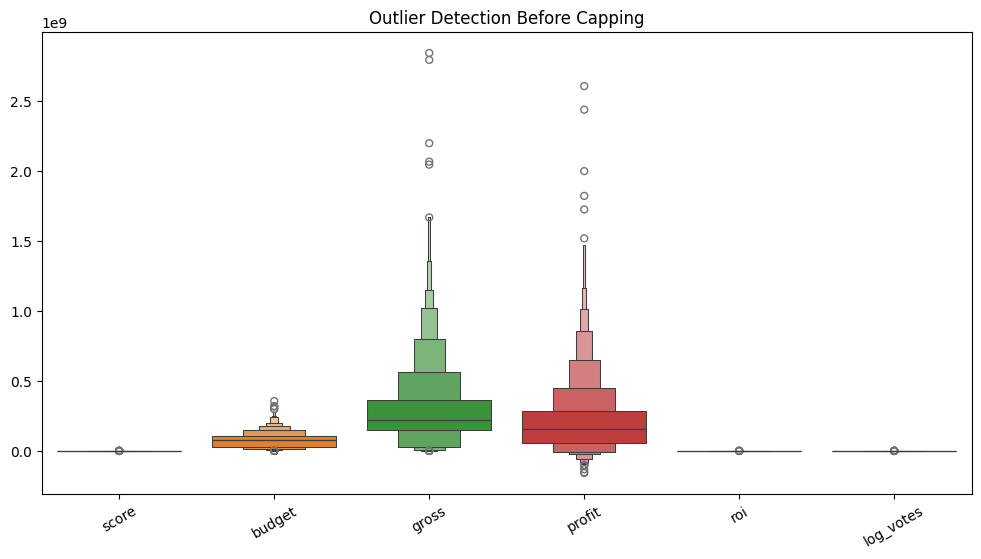

In [19]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = (df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)
outlier_rows = df.loc[outliers_iqr.any(axis=1), numeric_cols]

plt.figure(figsize=(12, 6))
sns.boxenplot(data=outlier_rows[numeric_cols])
plt.xticks(rotation=30)
plt.title("Outlier Detection Before Capping")
plt.show()

## **Numeric Distributions**

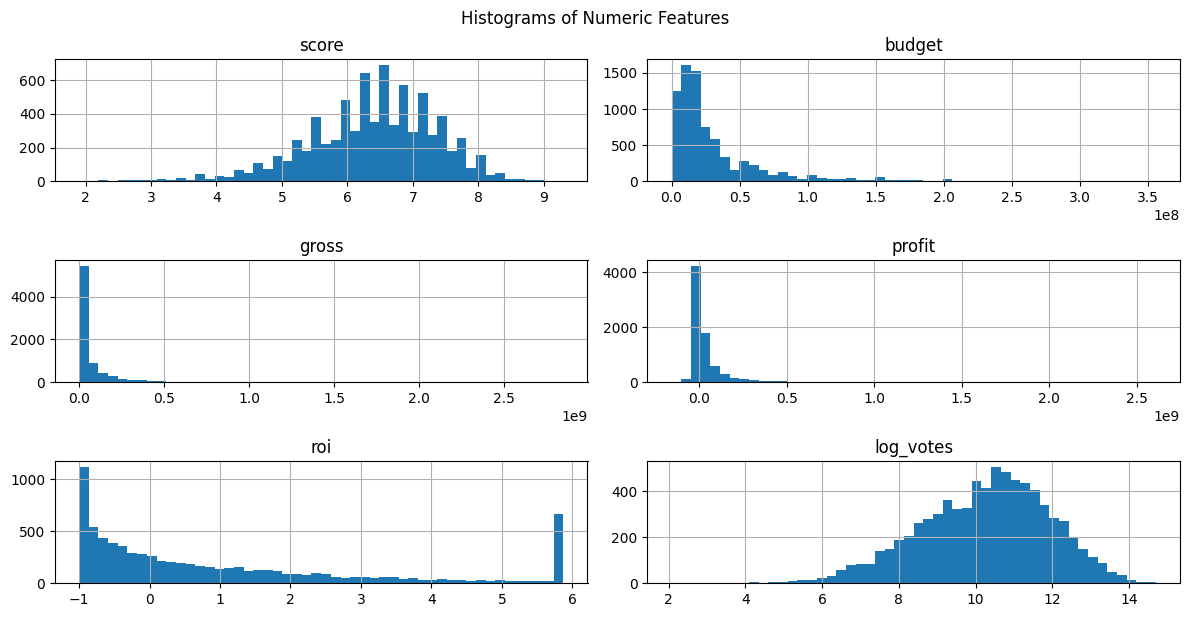

In [20]:
# Histogram — Overview of distribution & skew
df[numeric_cols].hist(bins=50, figsize=(12, 6))
plt.tight_layout()
plt.suptitle("Histograms of Numeric Features", y=1.02)
plt.show()

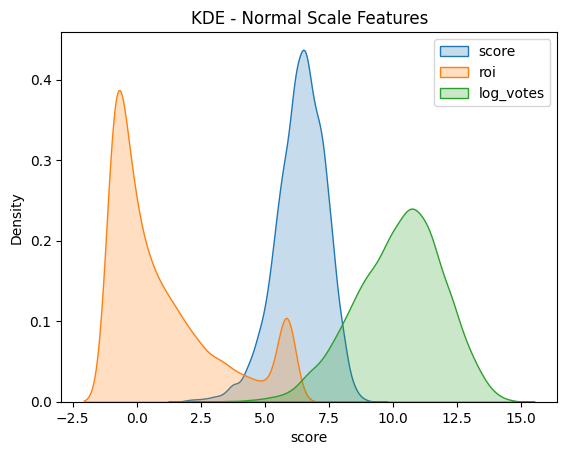

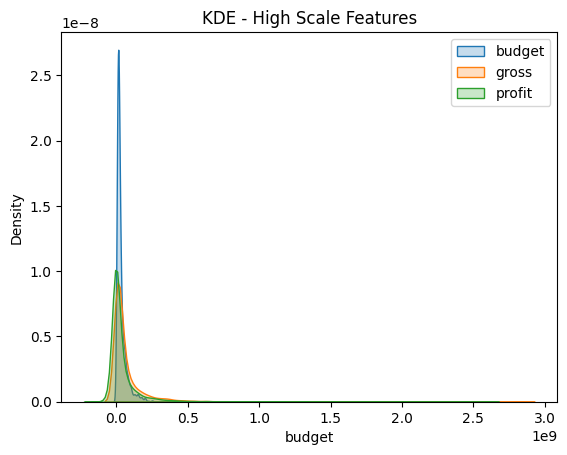

In [21]:
# plot KDEs seperately
# for col in numeric_cols:
#     plt.figure(figsize=(6, 4))
#     sns.kdeplot(df[col], fill=True)
#     plt.title(f"KDE Plot of {col}")
#     plt.show()

# Small scale
sns.kdeplot(df["score"], fill=True, label="score")
sns.kdeplot(df["roi"], fill=True, label="roi")
sns.kdeplot(df["log_votes"], fill=True, label="log_votes")
plt.title("KDE - Normal Scale Features")
plt.legend()
plt.show()

# Large scale
sns.kdeplot(df["budget"], fill=True, label="budget")
sns.kdeplot(df["gross"], fill=True, label="gross")
sns.kdeplot(df["profit"], fill=True, label="profit")
plt.title("KDE - High Scale Features")
plt.legend()
plt.show()

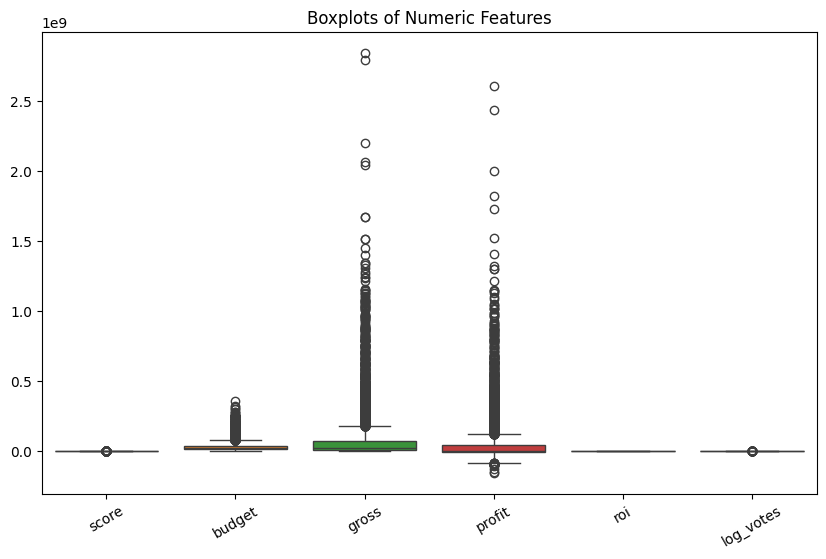

In [22]:
# Boxplot — Spread & outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=30)
plt.title("Boxplots of Numeric Features")
plt.show()

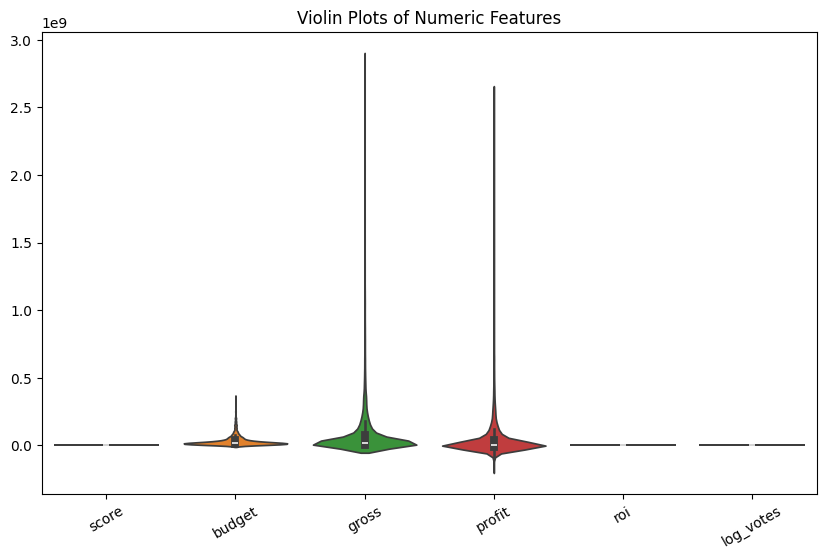

In [23]:
# Violin Plot — KDE + Box combined
plt.figure(figsize=(10,6))
sns.violinplot(data=df[numeric_cols])
plt.xticks(rotation=30)
plt.title("Violin Plots of Numeric Features")
plt.show()

## **Correlation Analysis**

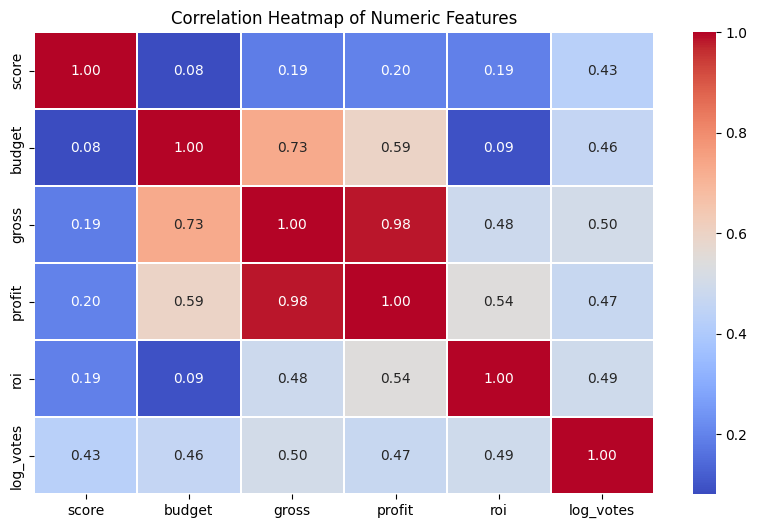

In [24]:
plt.figure(figsize=(10, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

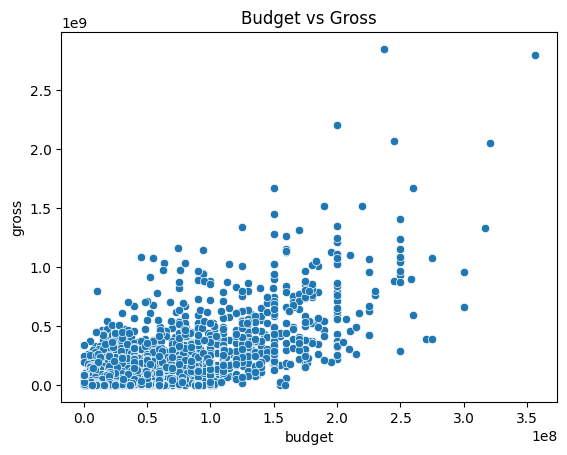

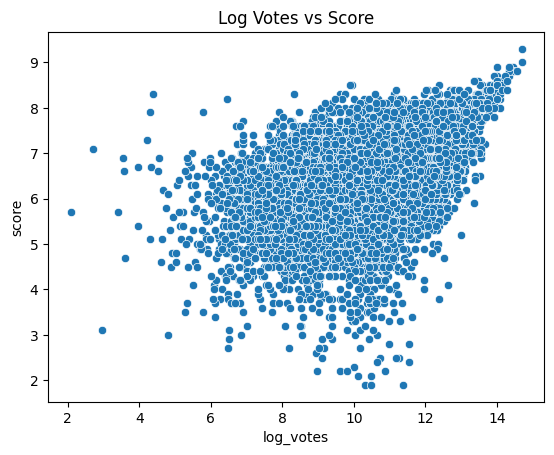

In [25]:
sns.scatterplot(x='budget', y='gross', data=df)
plt.title("Budget vs Gross")
plt.show()

sns.scatterplot(x='log_votes', y='score', data=df)
plt.title("Log Votes vs Score")
plt.show()

## **Grouped Comparison**

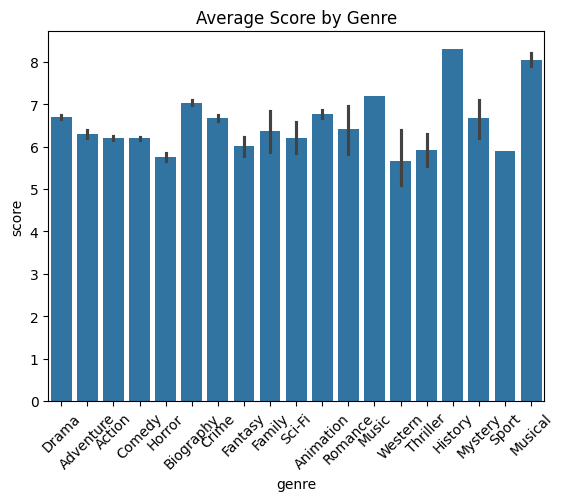

In [26]:
# Barplot: mean score by genre
sns.barplot(x="genre", y="score", data=df, estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Average Score by Genre")
plt.show()

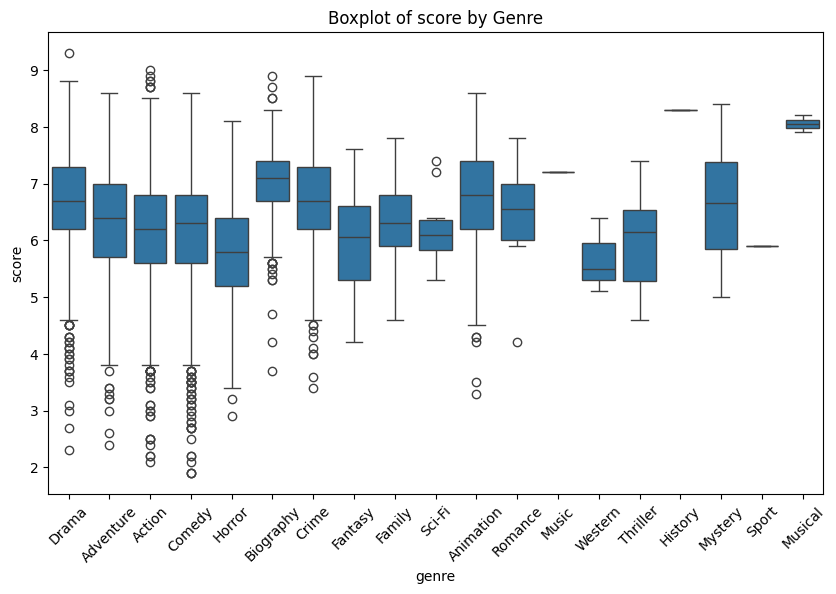

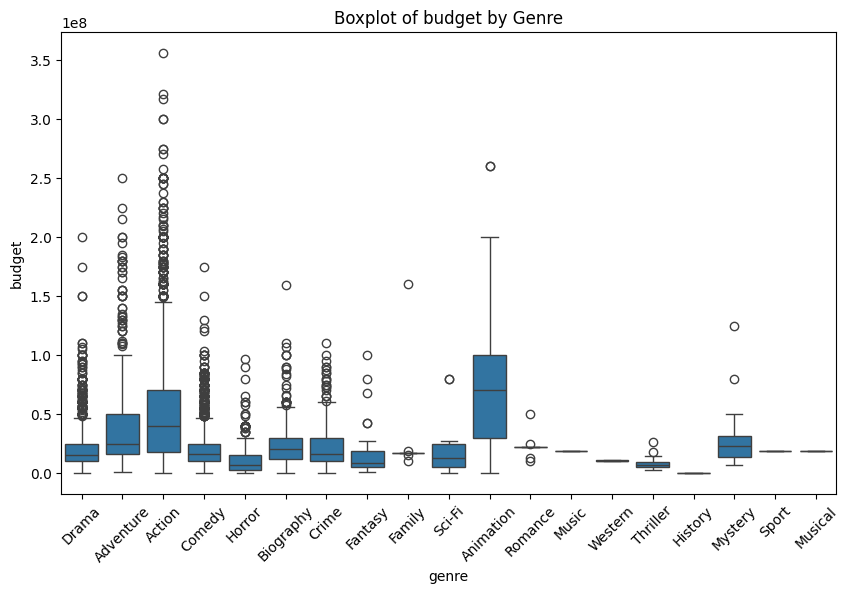

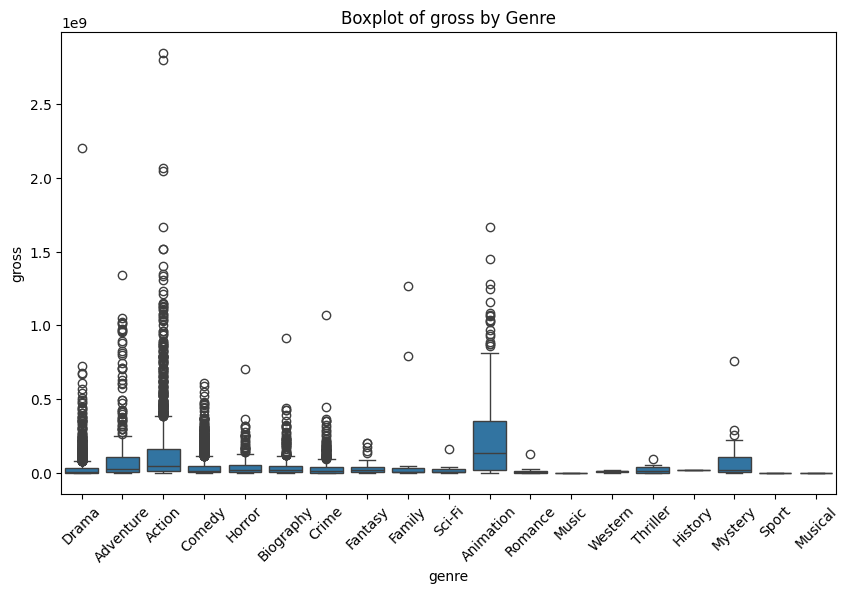

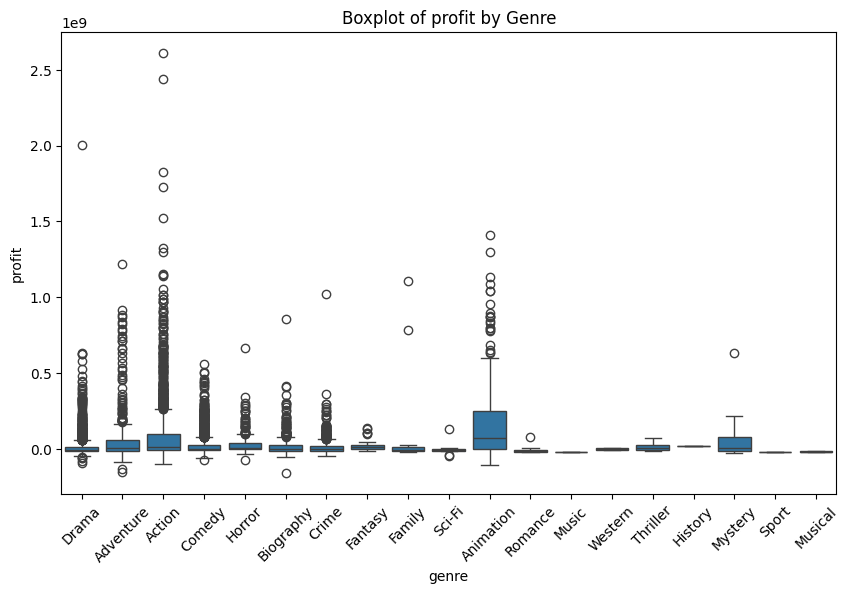

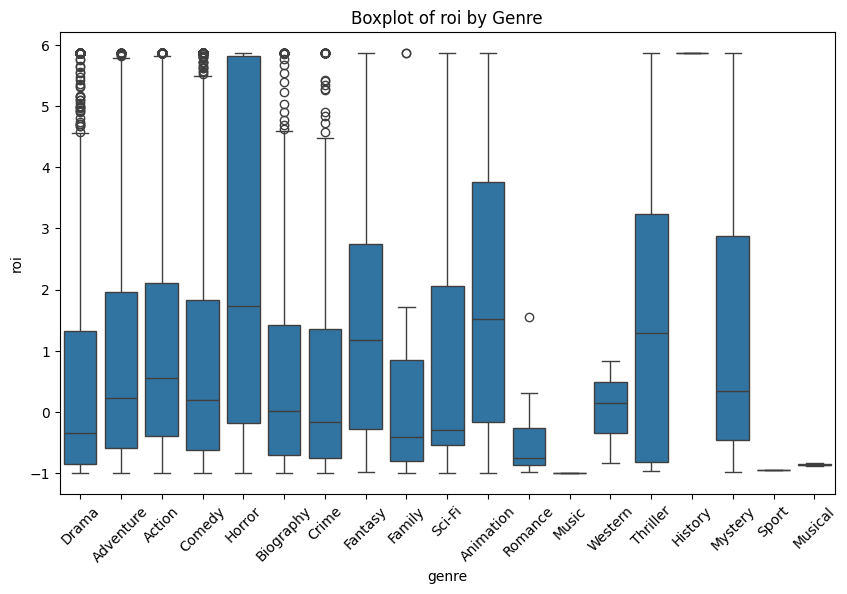

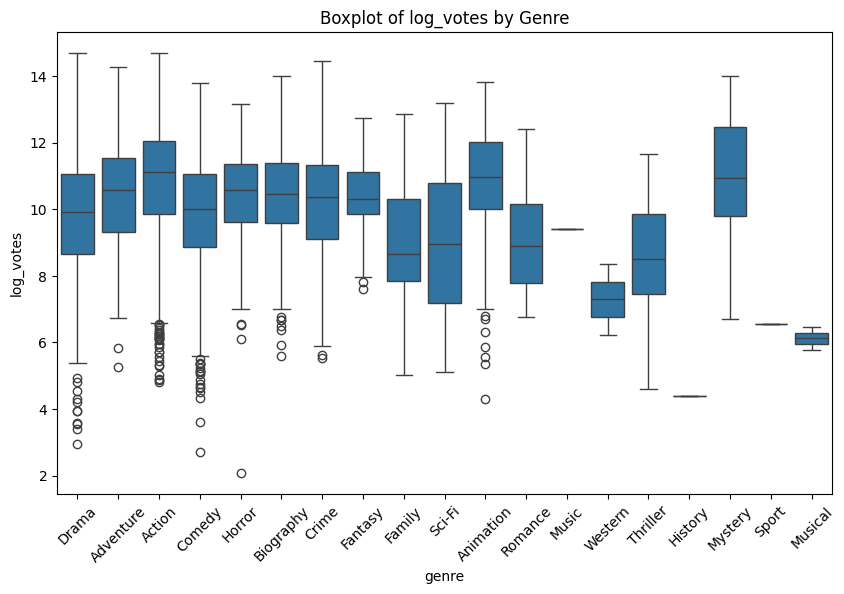

In [27]:
# numeric distribution by category
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="genre", y=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f"Boxplot of {col} by Genre")
    plt.show()

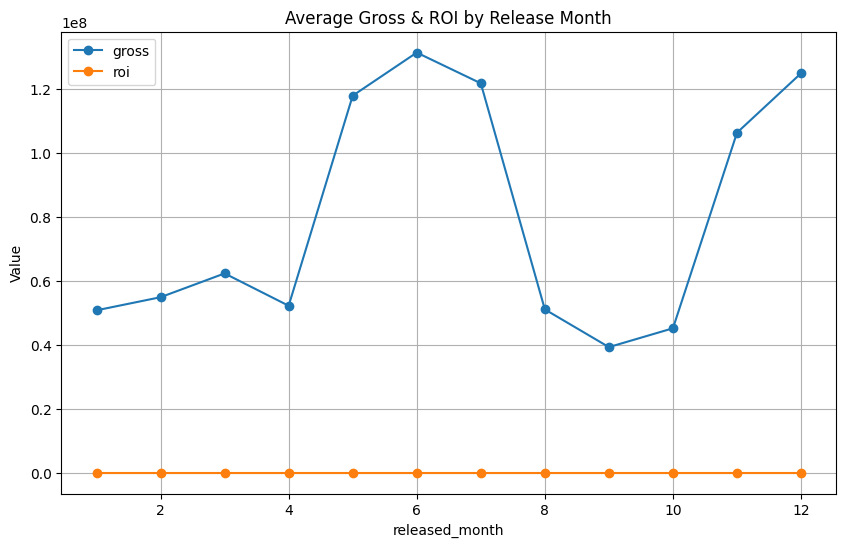

In [28]:
# Line Plot for seasonal patterns
df.groupby("released_month")[["gross", "roi"]].mean().plot(marker='o', figsize=(10,6))
plt.title("Average Gross & ROI by Release Month")
plt.ylabel("Value")
plt.grid(True)
plt.show()

## **Categorical Distributions**

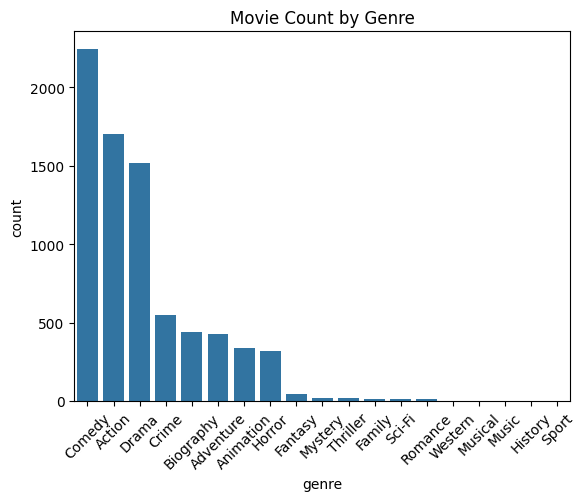

In [29]:
# frequency of each category
sns.countplot(x='genre', data=df,order=df['genre'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Movie Count by Genre")
plt.show()

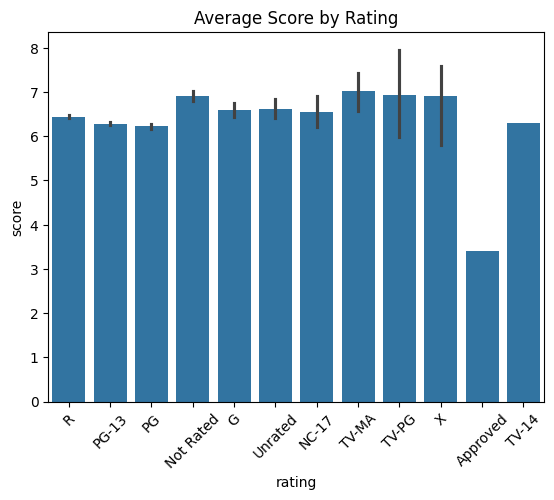

In [30]:
# category vs target (mean score, ROI, etc.)
sns.barplot(x='rating', y='score', data=df, estimator=np.mean, order=df['rating'].value_counts().index)
plt.title("Average Score by Rating")
plt.xticks(rotation=45)
plt.show()

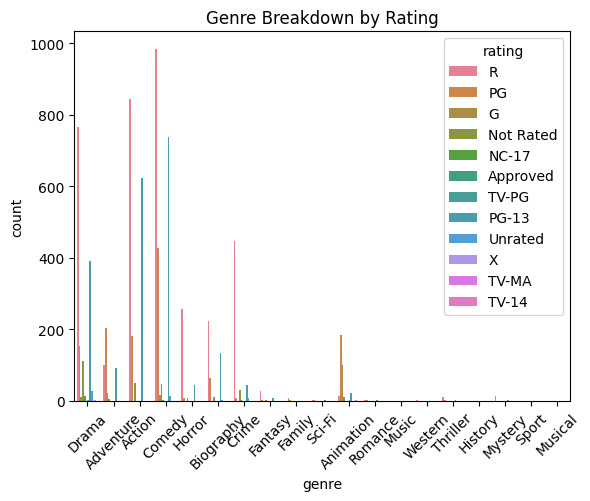

In [31]:
# Hue split by another categorical
sns.countplot(x='genre', hue='rating', data=df)
plt.xticks(rotation=45)
plt.title("Genre Breakdown by Rating")
plt.show()

# **STEP 5-7: DEMO**

In [ ]:
# Combine features for hybrid model
df["name_clean"] = df["name"].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).str.lower().str.strip()
df["genre_clean"] = df["genre"].fillna("").str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).str.lower().str.strip()
df["combo_text"] = df["name_clean"] + " " + df["genre_clean"]

# TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words="english")
combo_matrix = tfidf.fit_transform(df["combo_text"])

# Cosine similarity for hybrid recommendation
combo_sim = linear_kernel(combo_matrix, combo_matrix)
title_index = pd.Series(df.index, index=df["name"].str.lower()).drop_duplicates()

def recommend_hybrid(title, top_n=5):
    idx = title_index.get(title.lower())
    if idx is None:
        return f"❌ Movie '{title}' not found."
    sim_scores = list(enumerate(combo_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    return df["name"].iloc[[i[0] for i in sim_scores]]

# Light clustering (SVD + KMeans)
class SVDScaler(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=50):
        self.svd = TruncatedSVD(n_components=n_components, random_state=42)
        self.scaler = StandardScaler()
    def fit(self, X, y=None):
        self.scaler.fit(self.svd.fit_transform(X))
        return self
    def transform(self, X):
        return self.scaler.transform(self.svd.transform(X))

cluster_pipe = Pipeline([
    ("reduce_scale", SVDScaler(n_components=50)),
    ("kmeans", KMeans(n_clusters=6, random_state=42))
])

df["cluster"] = cluster_pipe.fit_predict(combo_matrix)

# Cluster-based recommendation
def recommend_by_cluster(title, top_n=5):
    idx = title_index.get(title.lower())
    if idx is None:
        return f"❌ Movie '{title}' not found."
    cluster = df.loc[idx, "cluster"]
    return df[df["cluster"] == cluster].sample(top_n, random_state=42)["name"]

# 🎬 Demo usage
movie_input = "The Matrix"

print(f"\n🎯 Hybrid Recommendations for '{movie_input}':")
for movie in recommend_hybrid(movie_input):
    print(f"🎬 {movie}")

print(f"\n🎯 Cluster-Based Recommendations for '{movie_input}':")
for movie in recommend_by_cluster(movie_input):
    print(f"🎬 {movie}")